## data preparation

In [1]:
import kagglehub

path = kagglehub.dataset_download("neuromusic/avocado-prices")

print("Path to dataset files:", path)

100%|██████████| 629k/629k [00:00<00:00, 68.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/neuromusic/avocado-prices/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/neuromusic/avocado-prices/versions/1

avocado.csv


In [3]:
file = "/root/.cache/kagglehub/datasets/neuromusic/avocado-prices/versions/1/avocado.csv"

In [4]:
import pandas as pd

df = pd.read_csv(file)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The data set includes information about the prices of (Hass) avocados and the amount sold (of different kinds) at different points in time.

Columns of interest are:

- Date: date of the observation
- AveragePrice: average price of a single avocado
- Total Volume: total number of avocados sold
- type: whether the price/amount is for conventional or organic
- 4046: total number of small avocados sold (PLU 4046)
- 4225: total number of medium avocados sold (PLU 4225)
- 4770: total number of large avocados sold (PLU 4770)
- Region: the city or region of the observation


In [ ]:
!pip install prophet

In [7]:
import numpy as np
from prophet import Prophet

df_avocado = df[df.type == 'conventional'].copy()
df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])
df_avocado = df_avocado.sort_values("Date")

In [8]:
df_avocado = df_avocado[['Date', 'AveragePrice']].reset_index(drop=True)
df_avocado.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
df_avocado.head()

,ds,y
0,2015-01-04,0.93
1,2015-01-04,1.10
2,2015-01-04,0.98
3,2015-01-04,1.40
4,2015-01-04,0.80


In [9]:
import plotly.express as px

fig = px.line(df_avocado, x='ds', y='y', title='Line plot of avocado dataset')
fig.show()

## Forecast avocodos average price with Prophet

In [10]:
m = Prophet()
m.fit(df_avocado)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxv0aso48/zmceyf9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxv0aso48/6xx16_ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98213', 'data', 'file=/tmp/tmpxv0aso48/zmceyf9l.json', 'init=/tmp/tmpxv0aso48/6xx16_ae.json', 'output', 'file=/tmp/tmpxv0aso48/prophet_modelrq60g86c/prophet_model-20250809113842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:38:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [13]:
forecast = m.predict(future)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.216815,0.822875,1.366384,1.216815,1.216815,-0.112454,-0.112454,-0.112454,-0.112454,-0.112454,-0.112454,0.0,0.0,0.0,1.104361
1,2015-01-11,1.212127,0.847830,1.384672,1.212127,1.212127,-0.094593,-0.094593,-0.094593,-0.094593,-0.094593,-0.094593,0.0,0.0,0.0,1.117533
2,2015-01-18,1.207438,0.834584,1.392205,1.207438,1.207438,-0.096790,-0.096790,-0.096790,-0.096790,-0.096790,-0.096790,0.0,0.0,0.0,1.110648
3,2015-01-25,1.202749,0.781971,1.353531,1.202749,1.202749,-0.131606,-0.131606,-0.131606,-0.131606,-0.131606,-0.131606,0.0,0.0,0.0,1.071143
4,2015-02-01,1.198061,0.741405,1.269725,1.198061,1.198061,-0.179303,-0.179303,-0.179303,-0.179303,-0.179303,-0.179303,0.0,0.0,0.0,1.018758


### Plotting forecast data

In [17]:
from prophet.plot import plot_plotly

plot_plotly(m, forecast)

In [18]:
# add change-points (where the trend model is shifting) to the plot

plot_plotly(m, forecast, changepoints=True)

In [27]:
# example of how to get the prediction of a specific date

prediction_day_19 = forecast.loc[18, 'yhat']
print(f"The predicted value for day 19 is: {prediction_day_19}")

The predicted value for day 19 is: 1.0494881446002648


## Plotting the forecasted components

In [19]:
from prophet.plot import plot_components_plotly

plot_components_plotly(m, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='540 days', period='31 days', horizon='180 days')

In [22]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-24,1.141377,0.929803,1.372844,1.20,2016-07-19
1,2016-07-24,1.141377,0.917757,1.370786,1.54,2016-07-19
2,2016-07-24,1.141377,0.916982,1.361239,1.21,2016-07-19
3,2016-07-24,1.141377,0.932816,1.370684,1.20,2016-07-19
4,2016-07-24,1.141377,0.919577,1.356074,1.15,2016-07-19


In [23]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,19 days,0.076489,0.276566,0.224016,0.191085,0.147774,0.180213,0.613510
1,20 days,0.076649,0.276856,0.224063,0.190967,0.147774,0.179995,0.613510
2,21 days,0.078825,0.280758,0.226355,0.196022,0.148542,0.182546,0.612524
3,22 days,0.080133,0.283078,0.229183,0.198004,0.149391,0.184809,0.606295
4,23 days,0.080885,0.284403,0.230710,0.200011,0.151835,0.186434,0.599577


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



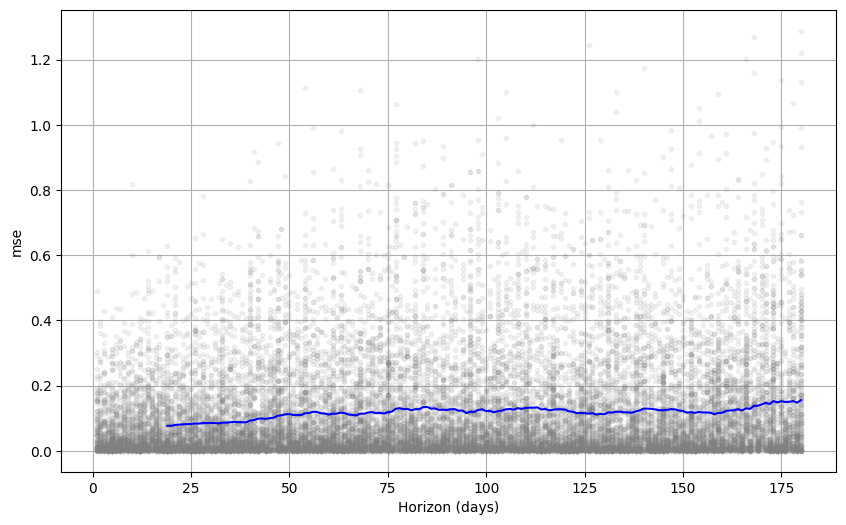

In [25]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mse')

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



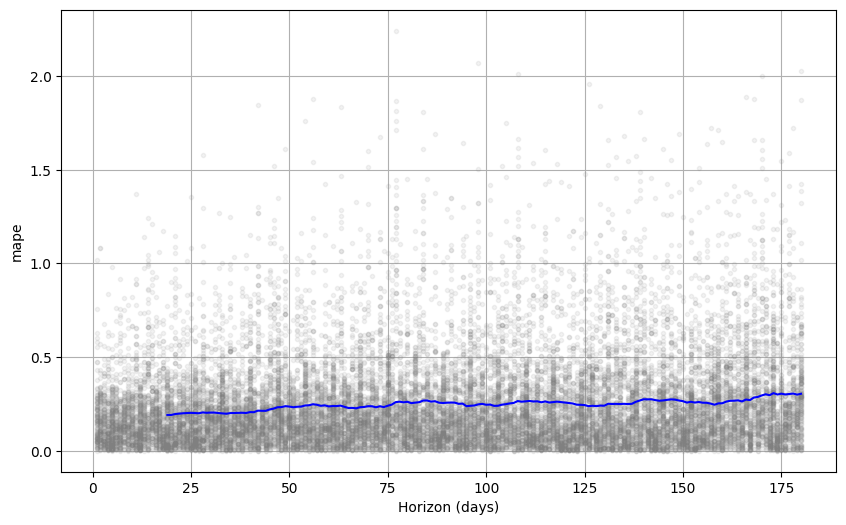

In [26]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

It shows that errors around 20% are typical for predictions 20 days into the future, and that errors increase up to around 30% for predictions 180 days into the future.

This notebook performs the following steps:

1.  **Data Loading and Preparation:** It downloads the avocado prices dataset from Kaggle, loads it into a pandas DataFrame, and inspects the columns.
2.  **Data Cleaning and Transformation:** It filters the data to include only 'conventional' type avocados, converts the 'Date' column to datetime objects, and sorts the data by date. It then renames the 'Date' and 'AveragePrice' columns to 'ds' and 'y' respectively, as required by the Prophet library.
3.  **Time Series Modeling with Prophet:** It initializes and fits a Prophet model to the prepared data.
4.  **Forecasting:** It creates a future DataFrame for 365 days and generates a forecast using the fitted Prophet model.
5.  **Visualization:** It visualizes the historical data and the forecast using plotly, including the option to display changepoints. It also attempts to plot the forecast components (trend, seasonality).
6.  **Model Evaluation:** It performs cross-validation to evaluate the model's performance over different horizons and calculates performance metrics such as MSE and MAPE. It also visualizes the cross-validation results.

In essence, the notebook demonstrates how to use the Prophet library to forecast avocado prices based on historical data, visualize the forecast and its components, and evaluate the model's accuracy.